In [4]:
%install_ext https://raw.githubusercontent.com/joelkim/ipython-tikzmagic/master/tikzmagic.py

Installed tikzmagic.py. To use it, type:
  %load_ext tikzmagic


In [5]:
%load_ext tikzmagic

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


# 신경망 기초 이론

신경망(neural network) 모형은 퍼셉트론, 서포트 벡터 머신, 로지스틱 회귀 등의 분류 모형과 달리 기저 함수(basis function)도 사용자 파라미터에 의해 변화할 수 있는 적응형 기저 함수 모형(adaptive basis function model)이며 구조적으로는 여러개의 퍼셉트론을 쌓아놓은 형태이므로 MLP(multi-layer perceptron)으로도 불린다.

## 퍼셉트론 복습

다음 그림과 같이 독립 변수 벡터가 3차원인 간단한 퍼셉트론 모형을 가정한다.

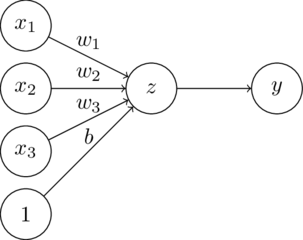

In [6]:
%%tikz
\tikzstyle{neuron}=[circle, draw, minimum size=23pt,inner sep=0pt]
\tikzstyle{bias}=[text centered]

\node[neuron] (node) at (2,0) {$z$};
\node[neuron] (x1) at (0, 1) {$x_1$};
\node[neuron] (x2) at (0, 0) {$x_2$};
\node[neuron] (x3) at (0,-1) {$x_3$};
\node[neuron] (b)  at (0,-2) {$1$};
\node[neuron] (output) at (4,0) {$y$};
\draw[->] (x1) -- node[above] {$w_1$} (node);
\draw[->] (x2) -- node[above] {$w_2$} (node);
\draw[->] (x3) -- node[above] {$w_3$} (node);
\draw[->] (b) -- node[above] {$b$} (node);
\draw[->] (node) -- (output);

* 입력 $x$
 $$ x_1,x_2,x_3 $$
 
* 가중치  $w$
 $$ w_1, w_2, w_3 $$

* 상수항(bias) $b$를 포함한 활성화값(activation)
 $$ a = \sum_{j=1}^3 w_j x_j + b $$

* 비선형 활성화 함수 $h$
 $$ z = h(a) = h \left( \sum_{j=1}^3 w_j x_j + b \right) $$


* 출력 $y$
$$
y = 
\begin{cases} 
0 & \text{if } z \leq 0, \\
1 & \text{if } z > 0
\end{cases}
$$

이런 퍼셉트론에서 $x$ 대신 기저 함수를 적용한 $\phi(x)$를 사용하면 XOR 문제 등의 비선형 문제를 해결할 수 있다. 그러나 고정된 기저 함수를 사용해야 하므로 문제에 맞는 기저 함수를 찾아야 한다는 단점이 있다.

만약 기저 함수 $\phi(x)$의 형태를 추가적인 모수 $w^{(1)}$를 사용하여 조절할 수 있다면 즉, 기저함수 $\phi(x;w^{(1)})$ 를 사용하면 $w^{(1)}$ 값을 바꾸는 것만으로 다양한 기저 함수를 시도할 수 있다.


 $$ z = h \left(  \sum_{j=1} w_j^{(2)} \phi(x_j ; w^{(1)}, b^{(1)}) + b^{(2)} \right) $$

신경망은 다음과 같이 원래 퍼셉트론과 같은 형태의 적응형 기저함수를 사용한 모형이다.

$$ \phi(x_j ; w^{(1)}, b^{(1)})  = h \left(  \sum_{i=1} w_i^{(1)} w + b^{(1)} \right)  $$

즉 전체 모형은 다음과 같다.

$$ z = h \left(  \sum_{j=1} w_j^{(2)} h \left(  \sum_{i=1} w_i^{(1)} w + b^{(1)} \right)  + b^{(2)} \right) $$

일반적으로 활성화 함수 $h$ 는 다음과 같은 시그모이드 함수 $\sigma$를 사용한다.


$$ 
\begin{eqnarray} 
z = \sigma(a) \equiv \frac{1}{1+e^{-a}}.
\end{eqnarray} 
$$

$$ 
\begin{eqnarray} 
\frac{1}{1+\exp(-\sum_j w_j x_j-b)}
\end{eqnarray} 
$$

이 시그모이드 함수의 특징은 다음과 같은 미분값을 가진다는 것이다.

$$ \sigma' = \sigma(1-\sigma) $$


## 퍼셉트론을 사용한 XOR 문제 해결법

퍼셉트론를 연속적으로 연결하여 비선형 문제를 해결하는 방법은 이미 디지털 회로 설계에서 사용되던 방법이다.

퍼셉트론의 가중치를 적절히 조정하면 다음과 같은 AND / OR 등의 디지털 게이트(gate)를 제작할 수 있다.

예를 들어 $w_1 = -2$, $w_2 = -2$, $b = 3$ 인 퍼셉트론은 NAND 게이트를 구현한다.


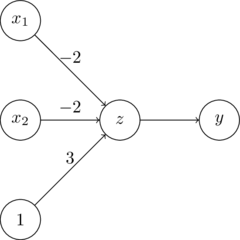

In [11]:
%%tikz
\tikzstyle{neuron}=[circle, draw, minimum size=23pt,inner sep=0pt, node distance=2cm]

\node[neuron] (node) {$z$};
\node[neuron] (x2) [left of=node] {$x_2$};
\node[neuron] (x1) [above of=x2]  {$x_1$};
\node[neuron] (b)  [below of=x2]  {$1$};
\node[neuron] (output) [right of=node] {$y$};
\draw[->] (x1) -- node[above=0.1] {$-2$} (node);
\draw[->] (x2) -- node[above] {$-2$} (node);
\draw[->] (b) -- node[above=0.1] {$3$} (node);
\draw[->] (node) -- (output);


<table style="display: inline-table; margin-right: 30pt;">
<tbody><tr style="background:#def; text-align:center;">
<td colspan="2" style="text-align:center;"><b>INPUT</b></td>
<td colspan="3" style="text-align:center;"><b>OUTPUT</b></td>
</tr>
<tr style="background:#def; text-align:center;">
<td>A</td>
<td>B</td>
<td>A AND B</td>
<td>A NAND B</td>
<td>A XOR B</td>
</tr>
<tr style="background:#dfd; text-align:center;">
<td>0</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
<tr style="background:#dfd; text-align:center;">
<td>0</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>
<tr style="background:#dfd; text-align:center;">
<td>1</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>
<tr style="background:#dfd; text-align:center;">
<td>1</td>
<td>1</td>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>
</tbody></table>


* $x_1 = 0$, $x_2 = 0$
 * $ (−2)\times 0+(−2)\times 0+3=3 > 0 \rightarrow 1$
* $x_1 = 0$, $x_2 = 1$
 * $ (−2)\times 0+(−2)\times 1+3=1 > 0 \rightarrow 1$
* $x_1 = 1$, $x_2 = 0$
 * $ (−2)\times 1+(−2)\times 0+3=1 > 0 \rightarrow 1$
* $x_1 = 1$, $x_2 = 1$
 * $ (−2)\times 1+(−2)\times 1+3=-1 < 0 \rightarrow 0$


디지털 회로에서는 복수개의 NAND 게이트를 조합하면 어떤 디지털 로직이라도 구현 가능하다. 예를 들어 다음 회로는 두 입력 신호의 합과 자릿수를 반환하는 반가산기(half adder) 회로이다.

<img src="https://datascienceschool.net/upfiles/3002b65c9f034818a318ad7f6b09671f.png">

이 퍼셉트론 조합을 보면 4개의 퍼셉트론을 연결하여 XOR 로직을 구현하였음을 알 수 있다.

## 다계층 퍼셉트론 (MLP: Multi-Layer Perceptrons)

신경망은 퍼셉트론을 여러개 연결한 것으로 다계층 퍼셉트론(MLP: Multi-Layer Perceptrons)이라고도 한다. 신경망에 속한 퍼셉트론은 뉴론(neuron) 또는 노드(node)라고 불린다.

각 계층(layer)은 다음 계층에 대해 적응형 기저 함수의 역할을 한다. 최초의 계층은 입력 계층(input layer), 마지막 계측은 출력 계층(output layer)이라고 하며 중간은 은닉 계층(hidden layer)라고 한다.

<img src="https://datascienceschool.net/upfiles/4dcef7b75de64023900c7f7edb7cbb2f.png">

MLP의 또다른 특징은 출력 계층에 복수개의 출력 뉴런를 가지고 각 뉴런값으로 출력 클래스의 조건부 확률을 반환하도록 설계하여 멀티 클래스 문제를 해결할 수도 있다는 점이다.

다음은 필기 숫자에 대한 영상 정보를 입력 받아 숫자 0 ~ 9 까지의 조건부 확률을 출력하는 MLP의 예이다. 입력 영상이 28 x 28 해상도를 가진다면 입력 계층의 뉴런 수는 $28 \times 28 = 784$ 개가 된다. 출력은 숫자 0 ~ 9 까지의 조건부 확률을 출력하는 $10$ 개의 뉴런을 가진다.

그림의 모형은 $15$개의 뉴런을 가지는 $1$ 개의 은닉 계층을 가진다.

<img src="https://datascienceschool.net/upfiles/90f2752671424cef846839b89ddcf6aa.png">


## 신경망 가중치 표기법

신경망의 가중치는 $w^{l}_{j,k}$ 과 같이 표기한다. 이 가중치는  $l-1$ 번째 계층의  $k$번째 뉴런와 $l$ 번째 계층의 $j$번째 뉴런을 연결하는 가중치를 뜻한다. 첨자의 순서에 주의한다.


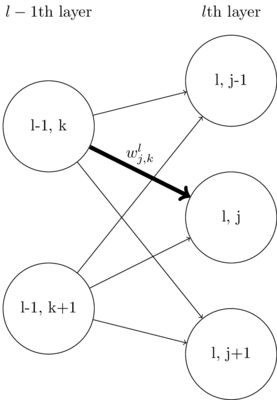

In [10]:
%%tikz --size 600,400
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm]

\node () at (0, 4.5) {$l-1$th layer};
\node () at (4, 4.5) {$l$th layer};
\node[neuron] (i1) at (0,  2) {l-1, k};
\node[neuron] (i2) at (0, -2) {l-1, k+1};
\node[neuron] (h11) at (4,  3) {l, j-1};
\node[neuron] (h12) at (4,  0) {l, j};
\node[neuron] (h13) at (4, -3) {l, j+1};
\draw[->] (i1) -- (h11);
\draw[->] (i2) -- (h11);
\draw[->, line width=0.9mm] (i1) -- node[above=0.2] {$w^{l}_{j,k}$ } (h12);
\draw[->] (i2) -- (h12);
\draw[->] (i1) -- (h13);
\draw[->] (i2) -- (h13);


## Feedforward propagation

신경망의 계산 과정은 실제 신경망에서 신호가 전달과는 과정과 유사하므로 Feedforward propagation 이라고 불린다.

$l$번째 계층의 $j$번째 뉴런에서의 출력값 $z^l$은 다음과 같이 정의된다.


$$
\begin{eqnarray} 
  z^{l}_j = h \left( \sum_k w^{l}_{jk} z^{l-1}_k + b^l_j \right) = h \left( w^{l}_{j} \cdot z^{l-1} + b^l_j \right)
\end{eqnarray}
$$

$l$번째 계층 전체의 출력은 다음과 같이 표시할 수 있다.

$$
\begin{eqnarray} 
  z^{l} = h \left( \sum_k w^{l}_{k} z^{l-1}_k + b^l \right) = h \left( w^{l}  \cdot z^{l-1} + b^l \right)
\end{eqnarray}
$$


$$
a^l \equiv w^l \cdot z^{l-1}+b^l
$$


$$
\begin{eqnarray} 
  z^{l} =  h \left( a^l \right)
\end{eqnarray}
$$

아래에 Feedforward propagation 예를 보였다.

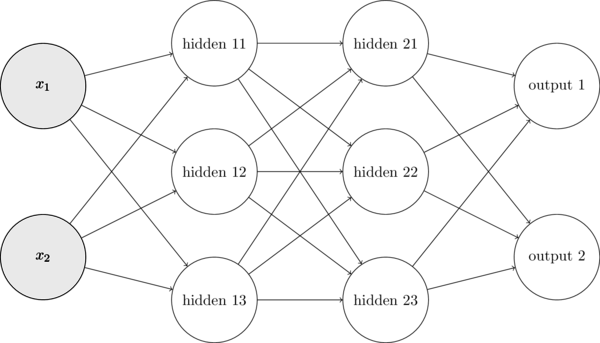

In [11]:
%%tikz --size 600,400
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm]

\node[neuron, fill=gray!10] (i1) at (0,  2) {$x_1$};
\node[neuron, fill=gray!10] (i2) at (0, -2) {$x_2$};

\node[neuron] (h11) at (4,  3) {hidden 11};
\node[neuron] (h12) at (4,  0) {hidden 12};
\node[neuron] (h13) at (4, -3) {hidden 13};
\draw[->] (i1) -- (h11);
\draw[->] (i2) -- (h11);
\draw[->] (i1) -- (h12);
\draw[->] (i2) -- (h12);
\draw[->] (i1) -- (h13);
\draw[->] (i2) -- (h13);

\node[neuron] (h21) at (8,  3) {hidden 21};
\node[neuron] (h22) at (8,  0) {hidden 22};
\node[neuron] (h23) at (8, -3) {hidden 23};
\draw[->] (h11) -- (h21);
\draw[->] (h11) -- (h22);
\draw[->] (h11) -- (h23);
\draw[->] (h12) -- (h21);
\draw[->] (h12) -- (h22);
\draw[->] (h12) -- (h23);
\draw[->] (h13) -- (h21);
\draw[->] (h13) -- (h22);
\draw[->] (h13) -- (h23);

\node[neuron] (o1) at (12,  2) {output 1};
\node[neuron] (o2) at (12, -2) {output 2};
\draw[->] (h21) -- (o1);
\draw[->] (h21) -- (o2);
\draw[->] (h22) -- (o1);
\draw[->] (h22) -- (o2);
\draw[->] (h23) -- (o1);
\draw[->] (h23) -- (o2);

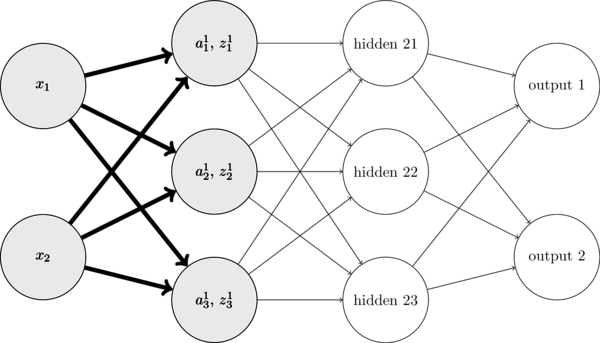

In [16]:
%%tikz --size 600,400
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm]

\node[neuron, fill=gray!10] (i1) at (0,  2) {$x_1$};
\node[neuron, fill=gray!10] (i2) at (0, -2) {$x_2$};

\node[neuron, fill=gray!10] (h11) at (4,  3) {$a^1_1$, $z^1_1$};
\node[neuron, fill=gray!10] (h12) at (4,  0) {$a^1_2$, $z^1_2$};
\node[neuron, fill=gray!10] (h13) at (4, -3) {$a^1_3$, $z^1_3$};
\draw[->, line width=1mm] (i1) -- (h11);
\draw[->, line width=1mm] (i2) -- (h11);
\draw[->, line width=1mm] (i1) -- (h12);
\draw[->, line width=1mm] (i2) -- (h12);
\draw[->, line width=1mm] (i1) -- (h13);
\draw[->, line width=1mm] (i2) -- (h13);

\node[neuron] (h21) at (8,  3) {hidden 21};
\node[neuron] (h22) at (8,  0) {hidden 22};
\node[neuron] (h23) at (8, -3) {hidden 23};
\draw[->] (h11) -- (h21);
\draw[->] (h11) -- (h22);
\draw[->] (h11) -- (h23);
\draw[->] (h12) -- (h21);
\draw[->] (h12) -- (h22);
\draw[->] (h12) -- (h23);
\draw[->] (h13) -- (h21);
\draw[->] (h13) -- (h22);
\draw[->] (h13) -- (h23);

\node[neuron] (o1) at (12,  2) {output 1};
\node[neuron] (o2) at (12, -2) {output 2};
\draw[->] (h21) -- (o1);
\draw[->] (h21) -- (o2);
\draw[->] (h22) -- (o1);
\draw[->] (h22) -- (o2);
\draw[->] (h23) -- (o1);
\draw[->] (h23) -- (o2);

$$ z^{1} = h \left( w^{1}  \cdot x + b^1 \right) = h \left( a^1 \right)$$

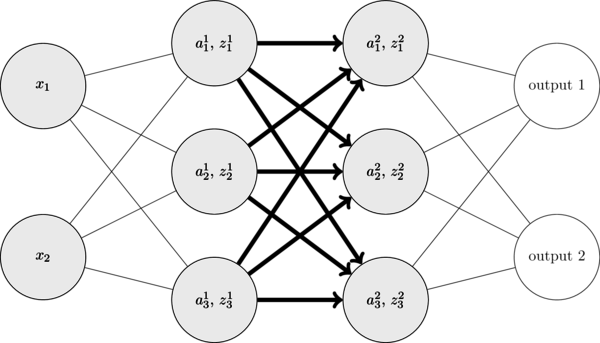

In [17]:
%%tikz --size 600,400
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm]

\node[neuron, fill=gray!10] (i1) at (0,  2) {$x_1$};
\node[neuron, fill=gray!10] (i2) at (0, -2) {$x_2$};

\node[neuron, fill=gray!10] (h11) at (4,  3) {$a^1_1$, $z^1_1$};
\node[neuron, fill=gray!10] (h12) at (4,  0) {$a^1_2$, $z^1_2$};
\node[neuron, fill=gray!10] (h13) at (4, -3) {$a^1_3$, $z^1_3$};
\draw[-] (i1) -- (h11);
\draw[-] (i2) -- (h11);
\draw[-] (i1) -- (h12);
\draw[-] (i2) -- (h12);
\draw[-] (i1) -- (h13);
\draw[-] (i2) -- (h13);

\node[neuron, fill=gray!10] (h21) at (8,  3) {$a^2_1$, $z^2_1$};
\node[neuron, fill=gray!10] (h22) at (8,  0) {$a^2_2$, $z^2_2$};
\node[neuron, fill=gray!10] (h23) at (8, -3) {$a^2_3$, $z^2_3$};
\draw[->, line width=1mm] (h11) -- (h21);
\draw[->, line width=1mm] (h11) -- (h22);
\draw[->, line width=1mm] (h11) -- (h23);
\draw[->, line width=1mm] (h12) -- (h21);
\draw[->, line width=1mm] (h12) -- (h22);
\draw[->, line width=1mm] (h12) -- (h23);
\draw[->, line width=1mm] (h13) -- (h21);
\draw[->, line width=1mm] (h13) -- (h22);
\draw[->, line width=1mm] (h13) -- (h23);

\node[neuron] (o1) at (12,  2) {output 1};
\node[neuron] (o2) at (12, -2) {output 2};
\draw[-] (h21) -- (o1);
\draw[-] (h21) -- (o2);
\draw[-] (h22) -- (o1);
\draw[-] (h22) -- (o2);
\draw[-] (h23) -- (o1);
\draw[-] (h23) -- (o2);

$$ z^{2} = h \left( w^{2}  \cdot z^{1} + b^2 \right) = h \left( a^2 \right)$$

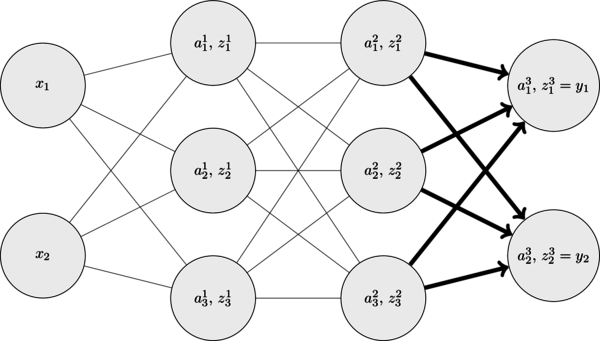

In [19]:
%%tikz --size 600,400
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm]

\node[neuron, fill=gray!10] (i1) at (0,  2) {$x_1$};
\node[neuron, fill=gray!10] (i2) at (0, -2) {$x_2$};

\node[neuron, fill=gray!10] (h11) at (4,  3) {$a^1_1$, $z^1_1$};
\node[neuron, fill=gray!10] (h12) at (4,  0) {$a^1_2$, $z^1_2$};
\node[neuron, fill=gray!10] (h13) at (4, -3) {$a^1_3$, $z^1_3$};
\draw[-] (i1) -- (h11);
\draw[-] (i2) -- (h11);
\draw[-] (i1) -- (h12);
\draw[-] (i2) -- (h12);
\draw[-] (i1) -- (h13);
\draw[-] (i2) -- (h13);

\node[neuron, fill=gray!10] (h21) at (8,  3) {$a^2_1$, $z^2_1$};
\node[neuron, fill=gray!10] (h22) at (8,  0) {$a^2_2$, $z^2_2$};
\node[neuron, fill=gray!10] (h23) at (8, -3) {$a^2_3$, $z^2_3$};
\draw[-] (h11) -- (h21);
\draw[-] (h11) -- (h22);
\draw[-] (h11) -- (h23);
\draw[-] (h12) -- (h21);
\draw[-] (h12) -- (h22);
\draw[-] (h12) -- (h23);
\draw[-] (h13) -- (h21);
\draw[-] (h13) -- (h22);
\draw[-] (h13) -- (h23);

\node[neuron, fill=gray!10] (o1) at (12,  2) {$a^3_1$, $z^3_1=y_1$};
\node[neuron, fill=gray!10] (o2) at (12, -2) {$a^3_2$, $z^3_2=y_2$};
\draw[->, line width=1mm] (h21) -- (o1);
\draw[->, line width=1mm] (h21) -- (o2);
\draw[->, line width=1mm] (h22) -- (o1);
\draw[->, line width=1mm] (h22) -- (o2);
\draw[->, line width=1mm] (h23) -- (o1);
\draw[->, line width=1mm] (h23) -- (o2);

$$ y = z^{3} = h \left( w^{3}  \cdot z^{2} + b^3 \right) = h \left( a^3 \right)$$

## 오차 함수

신경망의 오차 함수는 조건부 확률이라는 실수 값을 출력해야 하므로  퍼셉트론과 달리 제곱합 오차 함수를 사용한다.

$$
\begin{eqnarray}  C(w,b) \equiv
  \frac{1}{2n} \sum_i \| y_i - y(x_i; w, b)\|^2
\end{eqnarray}
$$


## 가중치 최적화 

오차함수를 최소화하는 최적의 가중치를 찾기 위해 다음과 같이 미분(gradient)을 사용한 steepest gradient descent 방법을 적용한다.


$$
\begin{eqnarray}
  \Delta w = -\eta \nabla C,
\end{eqnarray}
$$

여기에서 $\eta$는 최적화 속도(learning rate)이다.


$$
\begin{eqnarray}
  \nabla C \equiv \left(\frac{\partial C}{\partial w_1}, \ldots, 
  \frac{\partial C}{\partial w_m}\right)^T
\end{eqnarray}
$$


가중치 갱신 공식은 다음과 같다.

$$
\begin{eqnarray}
  w_k & \rightarrow & w_k' = w_k-\eta \frac{\partial C}{\partial w_k} \\
  b_l & \rightarrow & b_l' = b_l-\eta \frac{\partial C}{\partial b_l}
\end{eqnarray}
$$

##  Stochastic Gradient Descent

실제로는 단순 Steepest Gradient Descent 방법보다 (SGC: Stochastic Gradient Descent)를 주로 사용한다. SGD는 미분 계산을 위해 전체 데이터 샘플을 모두 사용하지 않고  $m$개의 일부 데이터만 사용하여 미분을 계산하는 방법이다.


$$
\begin{eqnarray}
  \frac{\sum_{j=1}^m \nabla C_{X_{j}}}{m} \approx \frac{\sum_x \nabla C_x}{n} = \nabla C
\end{eqnarray}
$$


이 경우 가중치 갱신 공식은 다음과 같다.

$$
\begin{eqnarray} 
  w_k & \rightarrow & w_k' = w_k-\frac{\eta}{m}
  \sum_j \frac{\partial C_{X_j}}{\partial w_k} \\
  b_l & \rightarrow & b_l' = b_l-\frac{\eta}{m}
  \sum_j \frac{\partial C_{X_j}}{\partial b_l},
\end{eqnarray}
$$

## Back Propagation

단순하게 수치적으로 미분을 계산한다면 모든 가중치에 대해서 개별적으로 미분을 계산해야 한다. 그러나 back propagation 방법을 사용하면 모든 가중치에 대한 미분값을 한번에 계산할 수 있다.

back propagation 방법을 수식으로 표현하면 다음과 같다.

우선 $\delta$ 를 뒤에서 앞으로 전파한다. $\delta$는 다음과 같이 정의되는 값이다.

$$
\delta_j = \dfrac{\partial C}{\partial a_j}
$$


$$
\begin{eqnarray}
  \delta^{l-1}_j = h'(a^{l-1}_j) \sum_k w^l_{kj} \delta^l_k
\end{eqnarray}
$$


이 식을 벡터-행렬 식으로 쓰면 다음과 같다.

$$
\delta^{l-1} = h'(a^{l-1}) \odot ((w^{l})^T \delta^{l}) 
$$

여기에서 $\odot$ 연산 기호는 Hamadard Product 혹은 Schur product 라고 불리는 연산으로 정의는 다음과 같다.

$$
\left(\begin{array}{ccc} \mathrm{a}_{11} & \mathrm{a}_{12} & \mathrm{a}_{13}\\ \mathrm{a}_{21} & \mathrm{a}_{22} & \mathrm{a}_{23}\\ \mathrm{a}_{31} & \mathrm{a}_{32} & \mathrm{a}_{33} \end{array}\right) \odot \left(\begin{array}{ccc} \mathrm{b}_{11} & \mathrm{b}_{12} & \mathrm{b}_{13}\\ \mathrm{b}_{21} & \mathrm{b}_{22} & \mathrm{b}_{23}\\ \mathrm{b}_{31} & \mathrm{b}_{32} & \mathrm{b}_{33} \end{array}\right) = \left(\begin{array}{ccc} \mathrm{a}_{11}\, \mathrm{b}_{11} & \mathrm{a}_{12}\, \mathrm{b}_{12} & \mathrm{a}_{13}\, \mathrm{b}_{13}\\ \mathrm{a}_{21}\, \mathrm{b}_{21} & \mathrm{a}_{22}\, \mathrm{b}_{22} & \mathrm{a}_{23}\, \mathrm{b}_{23}\\ \mathrm{a}_{31}\, \mathrm{b}_{31} & \mathrm{a}_{32}\, \mathrm{b}_{32} & \mathrm{a}_{33}\, \mathrm{b}_{33} \end{array}\right)
$$


최종단의 $\delta$는  다음과 같이 예측 오차 그 자체이다.

$$
\delta^L_j = y_j - z_j
$$

이 오차값을 위 식에 따라 앞쪽으로 다시 전파하면 전체 가중치에 대한 미분을 구할 수 있다.

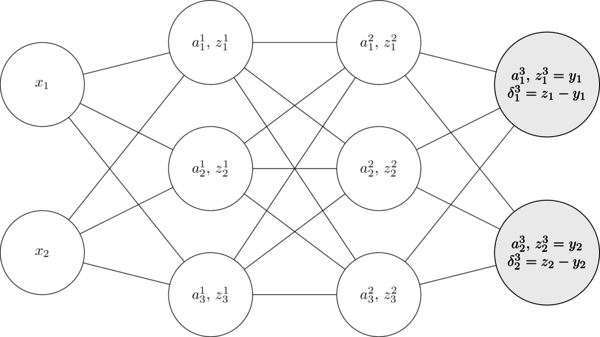

In [28]:
%%tikz --size 600,400
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm, align=center]

\node[neuron] (i1) at (0,  2) {$x_1$};
\node[neuron] (i2) at (0, -2) {$x_2$};

\node[neuron] (h11) at (4,  3) {$a^1_1$, $z^1_1$};
\node[neuron] (h12) at (4,  0) {$a^1_2$, $z^1_2$};
\node[neuron] (h13) at (4, -3) {$a^1_3$, $z^1_3$};
\draw[-] (i1) -- (h11);
\draw[-] (i2) -- (h11);
\draw[-] (i1) -- (h12);
\draw[-] (i2) -- (h12);
\draw[-] (i1) -- (h13);
\draw[-] (i2) -- (h13);

\node[neuron] (h21) at (8,  3) {$a^2_1$, $z^2_1$};
\node[neuron] (h22) at (8,  0) {$a^2_2$, $z^2_2$};
\node[neuron] (h23) at (8, -3) {$a^2_3$, $z^2_3$};
\draw[-] (h11) -- (h21);
\draw[-] (h11) -- (h22);
\draw[-] (h11) -- (h23);
\draw[-] (h12) -- (h21);
\draw[-] (h12) -- (h22);
\draw[-] (h12) -- (h23);
\draw[-] (h13) -- (h21);
\draw[-] (h13) -- (h22);
\draw[-] (h13) -- (h23);

\node[neuron, fill=gray!10] (o1) at (12,  2) {$a^3_1$, $z^3_1=y_1$ \\ $\delta^3_1 = z_1 - y_1$};
\node[neuron, fill=gray!10] (o2) at (12, -2) {$a^3_2$, $z^3_2=y_2$ \\ $\delta^3_2 = z_2 - y_2$};
\draw[-] (h21) -- (o1);
\draw[-] (h21) -- (o2);
\draw[-] (h22) -- (o1);
\draw[-] (h22) -- (o2);
\draw[-] (h23) -- (o1);
\draw[-] (h23) -- (o2);

$$
\delta^4_j = y_j - z_j
$$


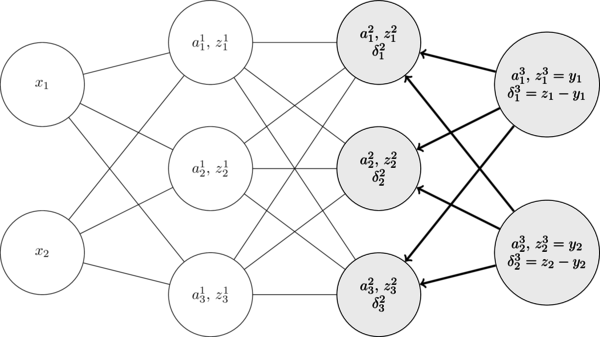

In [30]:
%%tikz --size 600,400
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm, align=center]

\node[neuron] (i1) at (0,  2) {$x_1$};
\node[neuron] (i2) at (0, -2) {$x_2$};

\node[neuron] (h11) at (4,  3) {$a^1_1$, $z^1_1$};
\node[neuron] (h12) at (4,  0) {$a^1_2$, $z^1_2$};
\node[neuron] (h13) at (4, -3) {$a^1_3$, $z^1_3$};
\draw[-] (i1) -- (h11);
\draw[-] (i2) -- (h11);
\draw[-] (i1) -- (h12);
\draw[-] (i2) -- (h12);
\draw[-] (i1) -- (h13);
\draw[-] (i2) -- (h13);

\node[neuron, fill=gray!10] (h21) at (8,  3) {$a^2_1$, $z^2_1$ \\ $\delta^2_1$};
\node[neuron, fill=gray!10] (h22) at (8,  0) {$a^2_2$, $z^2_2$ \\ $\delta^2_2$};
\node[neuron, fill=gray!10] (h23) at (8, -3) {$a^2_3$, $z^2_3$ \\ $\delta^2_3$};
\draw[-] (h11) -- (h21);
\draw[-] (h11) -- (h22);
\draw[-] (h11) -- (h23);
\draw[-] (h12) -- (h21);
\draw[-] (h12) -- (h22);
\draw[-] (h12) -- (h23);
\draw[-] (h13) -- (h21);
\draw[-] (h13) -- (h22);
\draw[-] (h13) -- (h23);

\node[neuron, fill=gray!10] (o1) at (12,  2) {$a^3_1$, $z^3_1=y_1$ \\ $\delta^3_1 = z_1 - y_1$};
\node[neuron, fill=gray!10] (o2) at (12, -2) {$a^3_2$, $z^3_2=y_2$ \\ $\delta^3_2 = z_2 - y_2$};
\draw[<-, line width=0.5mm] (h21) -- (o1);
\draw[<-, line width=0.5mm] (h21) -- (o2);
\draw[<-, line width=0.5mm] (h22) -- (o1);
\draw[<-, line width=0.5mm] (h22) -- (o2);
\draw[<-, line width=0.5mm] (h23) -- (o1);
\draw[<-, line width=0.5mm] (h23) -- (o2);

$$ \frac{\partial C}{\partial w^3_{jk}} = z^2_k \delta^3_j $$

$$ \delta^2 = h'(a^2) \odot ((w^{3})^T \delta^{3}) $$

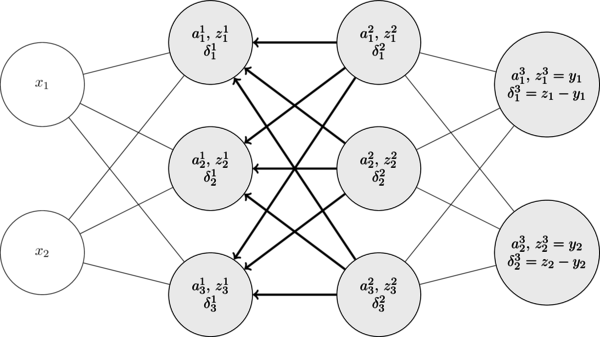

In [37]:
%%tikz --size 600,400
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm, align=center]

\node[neuron] (i1) at (0,  2) {$x_1$};
\node[neuron] (i2) at (0, -2) {$x_2$};

\node[neuron, fill=gray!10] (h11) at (4,  3) {$a^1_1$, $z^1_1$ \\ $\delta^1_1$};
\node[neuron, fill=gray!10] (h12) at (4,  0) {$a^1_2$, $z^1_2$ \\ $\delta^1_2$};
\node[neuron, fill=gray!10] (h13) at (4, -3) {$a^1_3$, $z^1_3$ \\ $\delta^1_3$};
\draw[-] (i1) -- (h11);
\draw[-] (i2) -- (h11);
\draw[-] (i1) -- (h12);
\draw[-] (i2) -- (h12);
\draw[-] (i1) -- (h13);
\draw[-] (i2) -- (h13);

\node[neuron, fill=gray!10] (h21) at (8,  3) {$a^2_1$, $z^2_1$ \\ $\delta^2_1$};
\node[neuron, fill=gray!10] (h22) at (8,  0) {$a^2_2$, $z^2_2$ \\ $\delta^2_2$};
\node[neuron, fill=gray!10] (h23) at (8, -3) {$a^2_3$, $z^2_3$ \\ $\delta^2_3$};
\draw[<-, line width=0.5mm] (h11) -- (h21);
\draw[<-, line width=0.5mm] (h11) -- (h22);
\draw[<-, line width=0.5mm] (h11) -- (h23);
\draw[<-, line width=0.5mm] (h12) -- (h21);
\draw[<-, line width=0.5mm] (h12) -- (h22);
\draw[<-, line width=0.5mm] (h12) -- (h23);
\draw[<-, line width=0.5mm] (h13) -- (h21);
\draw[<-, line width=0.5mm] (h13) -- (h22);
\draw[<-, line width=0.5mm] (h13) -- (h23);

\node[neuron, fill=gray!10] (o1) at (12,  2) {$a^3_1$, $z^3_1=y_1$ \\ $\delta^3_1 = z_1 - y_1$};
\node[neuron, fill=gray!10] (o2) at (12, -2) {$a^3_2$, $z^3_2=y_2$ \\ $\delta^3_2 = z_2 - y_2$};
\draw[-] (h21) -- (o1);
\draw[-] (h21) -- (o2);
\draw[-] (h22) -- (o1);
\draw[-] (h22) -- (o2);
\draw[-] (h23) -- (o1);
\draw[-] (h23) -- (o2);

$$ \frac{\partial C}{\partial w^2_{jk}} = z^1_k \delta^2_j $$

$$ \delta^1 = h'(a^1) \odot ((w^{2})^T \delta^{2}) $$

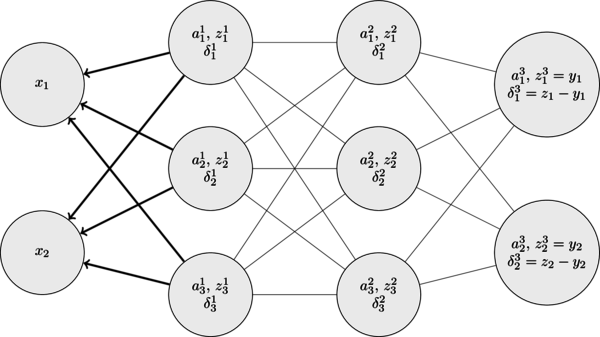

In [38]:
%%tikz --size 600,400
\tikzstyle{neuron}=[circle, draw, minimum size=2 cm,inner sep=5pt, node distance=2cm, align=center]

\node[neuron, fill=gray!10] (i1) at (0,  2) {$x_1$};
\node[neuron, fill=gray!10] (i2) at (0, -2) {$x_2$};

\node[neuron, fill=gray!10] (h11) at (4,  3) {$a^1_1$, $z^1_1$ \\ $\delta^1_1$};
\node[neuron, fill=gray!10] (h12) at (4,  0) {$a^1_2$, $z^1_2$ \\ $\delta^1_2$};
\node[neuron, fill=gray!10] (h13) at (4, -3) {$a^1_3$, $z^1_3$ \\ $\delta^1_3$};
\draw[<-, line width=0.5mm] (i1) -- (h11);
\draw[<-, line width=0.5mm] (i2) -- (h11);
\draw[<-, line width=0.5mm] (i1) -- (h12);
\draw[<-, line width=0.5mm] (i2) -- (h12);
\draw[<-, line width=0.5mm] (i1) -- (h13);
\draw[<-, line width=0.5mm] (i2) -- (h13);

\node[neuron, fill=gray!10] (h21) at (8,  3) {$a^2_1$, $z^2_1$ \\ $\delta^2_1$};
\node[neuron, fill=gray!10] (h22) at (8,  0) {$a^2_2$, $z^2_2$ \\ $\delta^2_2$};
\node[neuron, fill=gray!10] (h23) at (8, -3) {$a^2_3$, $z^2_3$ \\ $\delta^2_3$};
\draw[-] (h11) -- (h21);
\draw[-] (h11) -- (h22);
\draw[-] (h11) -- (h23);
\draw[-] (h12) -- (h21);
\draw[-] (h12) -- (h22);
\draw[-] (h12) -- (h23);
\draw[-] (h13) -- (h21);
\draw[-] (h13) -- (h22);
\draw[-] (h13) -- (h23);

\node[neuron, fill=gray!10] (o1) at (12,  2) {$a^3_1$, $z^3_1=y_1$ \\ $\delta^3_1 = z_1 - y_1$};
\node[neuron, fill=gray!10] (o2) at (12, -2) {$a^3_2$, $z^3_2=y_2$ \\ $\delta^3_2 = z_2 - y_2$};
\draw[-] (h21) -- (o1);
\draw[-] (h21) -- (o2);
\draw[-] (h22) -- (o1);
\draw[-] (h22) -- (o2);
\draw[-] (h23) -- (o1);
\draw[-] (h23) -- (o2);

$$ \frac{\partial C}{\partial w^1_{jk}} = x_k \delta^1_j $$



## Backpropagation 의 증명

체인 규칙(chain rule)을 적용하면

$$
\begin{eqnarray}
  \delta^l_j & = & \frac{\partial C}{\partial a^l_j} \\
  & = & \sum_k \frac{\partial C}{\partial a^{l+1}_k} \frac{\partial a^{l+1}_k}{\partial a^l_j} \\ 
  & = & \sum_k \delta^{l+1}_k \frac{\partial a^{l+1}_k}{\partial a^l_j} 
\end{eqnarray}
$$


여기에서 

$$
\begin{eqnarray}
  a^{l+1}_k = \sum_j w^{l+1}_{kj} z^l_j +b^{l+1}_k = \sum_j w^{l+1}_{kj} h (a^l_j) +b^{l+1}_k
\end{eqnarray}
$$


$$
\begin{eqnarray}
  \frac{\partial a^{l+1}_k}{\partial a^l_j} = w^{l+1}_{kj} h '(a^l_j)
\end{eqnarray}
$$

를 적용하면



$$
\begin{eqnarray}
  \delta^l_j = \sum_k \delta^{l+1}_k w^{l+1}_{kj} h '(a^l_j) = h '(a^l_j) \sum_k \delta^{l+1}_k w^{l+1}_{kj} 
\end{eqnarray}
$$



$$
\frac{\partial C}{\partial w^l_{jk}} = \frac{\partial C}{\partial a^l_{j}}  \frac{\partial a^l_{j}}{\partial w^l_{jk}} 
= \delta^l_j z^{l-1}_k 
$$

같은 방법으로 

$$
\begin{eqnarray}  
\frac{\partial C}{\partial b^l_j} =   \delta^l_j
\end{eqnarray}
$$


## 신경망 최적화 정리

정리하면 신경망은 다음과 같이 최적화한다.

1. Input 
 * 하나의 data sample $x_i$로 입력 계층 계산
2. Feedforward
 * 현재의 가중치를 사용하여 다음 계층 계산
3. Output and error
 * 최종 출력 계층의 값 및 오차 계산
4. Backpropagate
 * 반대 방향으로 오차 전파
5. Weight Upddate
 * 가중치 갱신
6. 데이터 샘플을 $x_{i+1}$로 바꾸어 1~6 반복

## Stochastic Gradient Descent 방법론


1. traning dataset 준비
2. mini batch data 선택. 각 data에 대해 gradient 계산
 1. Input 
 1. Feedforward
 1. Output and error
 1. Backpropagate 
3. Gradient descent
 *  mini batch 데이터셋에 대한 gradient 계산
$$w^l \rightarrow w^l-\frac{\eta}{m} \sum_x \delta^{x,l} (a^{x,l-1})^T$$
$$b^l \rightarrow b^l-\frac{\eta}{m} \sum_x \delta^{x,l}$$